**Set environment**

In [20]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
show_env()

You are working on        Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
REPO DIRECTORY (FD_REPO): /data/reddylab/Kuei/repo 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/work 
DATA DIRECTORY (FD_DATA): /data/reddylab/Kuei/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/log 
PROJECT REF     (FD_REF): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/references 



**Check: region directory**

In [2]:
txt_fdiry = file.path(FD_RES, "region_coverage_fcc_score")

vec = dir(txt_fdiry)
for (txt in vec){cat(txt, "\n")}

atac_ENCFF333TAT 
atac_ENCFF558BLC 
atac_ENCFF925CYR 
atac_ENCFF948AFM 
dnase_ENCFF185XRG 
dnase_ENCFF274YGF 
fcc_astarr_macs_input_overlap 
fcc_astarr_macs_input_union 


**Check: assay directory**

In [3]:
txt_region = "fcc_astarr_macs_input_union"
txt_fdiry  = file.path(FD_RES, "region_coverage_fcc_score", txt_region)
vec = dir(txt_fdiry)
for (txt in vec) {cat(txt, "\n")}

CRISPRi_FlowFISH_K562_Riley_JinWoo 
CRISPRi_Growth_K562_Gersbach_JinWoo 
MPRA_Lenti_K562_Nadav_Vikram 
MPRA_Tiling_K562_Tewhey_Hannah 
STARR_ATAC_K562_Reddy_KS274 
STARR_ATAC_K562_Reddy_KS91 
STARR_ATAC_K562_Reddy_KSMerge 
STARR_WHG_K562_Reddy_A001 
summary 


**Set global variable**

In [4]:
## init: region folder
vec = c("fcc_astarr_macs_input_overlap", "fcc_astarr_macs_input_union")
names(vec) = vec

VEC_TXT_FOLDER = vec
for (txt in vec) {cat(txt, "\n")}

fcc_astarr_macs_input_overlap 
fcc_astarr_macs_input_union 


In [5]:
TXT_ASSAY_OUT = "CRISPRi-Growth"
VEC_TXT_ASSAY = c("ASTARR", "WSTARR", "LMPRA", "TMPRA", "ATAC")

**Check input files**

In [9]:
txt_folder = VEC_TXT_FOLDER[1]
txt_fdiry  = file.path(FD_RES, "analysis_fcc_correlation", txt_folder)
txt_fname  = "region.coverage.score.*.tsv"
txt_fglob  = file.path(txt_fdiry, txt_fname)

vec = Sys.glob(txt_fglob)
for (txt in vec) {cat(txt, "\n")}

/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/analysis_fcc_correlation/fcc_astarr_macs_input_overlap/region.coverage.score.concat.tsv 


## Import data

In [8]:
lst = lapply(VEC_TXT_FOLDER, function(txt_folder){
    ### set file directory
    txt_fdiry  = file.path(FD_RES, "analysis_fcc_correlation", txt_folder)
    txt_fname = "region.coverage.score.concat.tsv"
    txt_fpath = file.path(txt_fdiry, txt_fname)

    ### read table
    dat = read_tsv(txt_fpath, show_col_types = FALSE)
    return(dat)
})

### assign and show
lst_dat_region_score_import = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
head(dat, 3)

$fcc_astarr_macs_input_overlap
[1] 586004      8

$fcc_astarr_macs_input_union
[1] 889739      8



Chrom,ChromStart,ChromEnd,Region,Score,Score_Label,Assay_Group,Assay_Label
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>
chr1,10038,10405,chr1:10038-10405,-3.5573621,Scale(Log2FC),ASTARR_KS91,ASTARR
chr1,14282,14614,chr1:14282-14614,0.0361388,Scale(Log2FC),ASTARR_KS91,ASTARR
chr1,16025,16338,chr1:16025-16338,-2.1376311,Scale(Log2FC),ASTARR_KS91,ASTARR


**Check: Assay count**

In [11]:
lst = lst_dat_region_score_import
lst = lapply(lst, function(dat){
    dat = dat %>% 
        dplyr::group_by(Assay_Group, Assay_Label) %>%
        dplyr::summarise(Freq = n(), .groups = "drop")
    return(dat)
})

dat = bind_rows(lst, .id = "Folder")
dat = dat %>% tidyr::spread(Folder, Freq)
fun_display_table(dat)

Assay_Group,Assay_Label,fcc_astarr_macs_input_overlap,fcc_astarr_macs_input_union
ASTARR_KS91,ASTARR,150040,246850
ASTARR_KS91,ATAC,150041,246852
CRISPRi-Growth,CRISPRi-Growth,72743,80288
CRISPRi-HCRFF,CRISPRi-HCRFF,925,1330
ENCODE-rE2G,ENCODE-rE2G Benchmark,3035,3169
LMPRA,LMPRA,61478,68497
TMPRA,TMPRA,1148,1722
WSTARR,WSTARR,146594,241031


**Check: Missing values**

In [12]:
lst = lst_dat_region_score_import
lst = lapply(lst, function(dat){
    tmp = any(is.na(dat))
    return(tmp)
})

print(lst)

$fcc_astarr_macs_input_overlap
[1] FALSE

$fcc_astarr_macs_input_union
[1] FALSE



## Prepare

In [15]:
### select and split regions by assay
idx = "fcc_astarr_macs_input_union"
lst = lst_dat_region_score_import

dat = lst[[idx]]
lst = split(dat, dat$Assay_Label)

### assign and show
lst_dat_region_score = lst
print(names(lst))

[1] "ASTARR"                "ATAC"                  "CRISPRi-Growth"       
[4] "CRISPRi-HCRFF"         "ENCODE-rE2G Benchmark" "LMPRA"                
[7] "TMPRA"                 "WSTARR"               


In [16]:
### get the output assay
lst = lst_dat_region_score
dat = lst[[TXT_ASSAY_OUT]]

### get the score of output assay
vec = dat$Score
vec = abs(vec)
vec_num_score = vec

### determine score cutoff
num_hit_rate = 0.01
num_cutoff = quantile(vec_num_score, probs = 1 - num_hit_rate)
cat("Score Cut-Off:", "\n")
print(num_cutoff)
cat("\n")

### setup group by cutoff
dat$Group = ifelse(vec_num_score >= num_cutoff, 1, 0)
dat = dat %>% dplyr::select(Region, Group)

### assign and show
dat_region_group = dat
print(dim(dat))
fun_display_table(head(dat, 3))

Score Cut-Off: 
      99% 
0.7447993 

[1] 80288     2


Region,Group
chr1:605090-605823,0
chr1:777949-779437,0
chr1:816774-817547,0


## Test

In [17]:
txt_assay = "WSTARR"

### get score from each input assay
lst = lst_dat_region_score
dat = lst[[txt_assay]]
dat = dat %>% dplyr::select(Region, Score)
dat_region_score = dat

### combine group and score
dat = dplyr::inner_join(
    dat_region_group,
    dat_region_score,
    by = "Region"
)
dat_region_merge = dat

### apply logistic regression
dat = dat_region_merge
#fit = glm(Group ~ Score, data = dat, family = "binomial")
#vec_boo_group = (dat$Group == 1)
#vec_num_score = predict(fit, type = "response")
print(dim(dat))
fun_display_table(head(dat))

[1] 79528     3


Region,Group,Score
chr1:777949-779437,0,2.8168646
chr1:816774-817547,0,-1.2780078
chr1:826754-828040,0,1.8370842
chr1:842480-843449,0,0.6598475
chr1:858023-859008,0,-0.0403536
chr1:865109-865909,0,-0.4157636


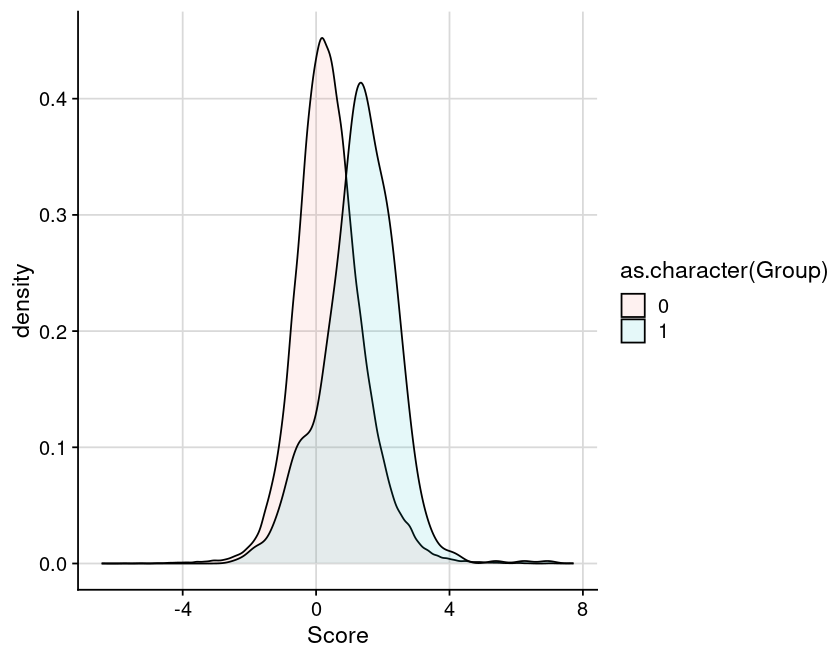

In [18]:
dat = dat_region_merge
gpt = ggplot(dat, aes(x = Score, fill = as.character(Group))) +
    geom_density(alpha = 0.1) +
    theme_cowplot() +
    background_grid()

options(repr.plot.width=7, repr.plot.height=5.5)
print(gpt)

In [19]:
wilcox.test(Score ~ Group, data = dat_region_merge)


	Wilcoxon rank sum test with continuity correction

data:  Score by Group
W = 16253442, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


## Helper function

In [12]:
fun_auroc = function(vec_boo_group, vec_num_score) {
    ### sort the group by score
    idx = order(vec_num_score)
    vec = vec_boo_group[idx]
    vec_group = vec

    ### calculate total positive and negative cases
    num_total_pos = sum( vec_group)
    num_total_neg = sum(!vec_group)
    if (num_total_pos == 0 || num_total_neg == 0) {
        stop("Need at least one TRUE and one FALSE")
    }
    
    ### calculate positive and negative rates
    vec_num_tpr = (num_total_pos - cumsum( vec_group)) / num_total_pos
    vec_num_fpr = (num_total_neg - cumsum(!vec_group)) / num_total_neg

    ### convert to sensitivity and specificity
    vec_num_sens = vec_num_tpr
    vec_num_spec = 1 - vec_num_fpr
    
    ### estimate the area under curve
    num_width = diff(c(0, 1 - vec_num_sens))
    num_auc   = sum(vec_num_spec * num_width)

    ### combine and return the results
    lst = list(
        "Sensitivity" = vec_num_sens,
        "Specificity" = vec_num_spec,
        "AUROC"       = num_auc
    )
    return(lst)
}

## Perform logistic regression for each assay

In [13]:
### loop through each input assay
lst = lapply(VEC_TXT_ASSAY, function(txt_assay){
    ### get score from each input assay
    lst = lst_dat_region_score
    dat = lst[[txt_assay]]
    dat = dat %>% dplyr::select(Region, Score)
    dat_region_score = dat

    ### combine group and score
    dat = dplyr::inner_join(
        dat_region_group,
        dat_region_score,
        by = "Region"
    )
    dat_region_merge = dat

    ### apply logistic regression
    dat = dat_region_merge
    fit = glm(Group ~ Score, data = dat, family = "binomial")
    vec_boo_group = (dat$Group == 1)
    vec_num_score = predict(fit, type = "response")

    ### calculate assay performance
    lst = fun_auroc(vec_boo_group, vec_num_score)
    vec_num_spec = lst[["Specificity"]]
    vec_num_sens = lst[["Sensitivity"]]
    num_auroc    = lst[["AUROC"]]

    ### summarize the results
    txt_title = paste0("(", round(num_auroc, 2), ")")
    txt_title = paste(txt_assay, txt_title)

    dat = data.frame(
        "x" = 1 - vec_num_spec,
        "y" = vec_num_sens,
        "Assay" = txt_assay,
        "AUROC" = num_auroc,
        "Performance" = txt_title
    )
    dat = dat %>% dplyr::arrange(x, y)
    return(dat)
})

### combine results across different input assay
dat = bind_rows(lst)

### assign and show
dat_auroc_assay = dat
print(dim(dat))
fun_display_table(head(dat, 3))

[1] 294769      5


x,y,Assay,AUROC,Performance
0.00e+00,0,ASTARR,0.6707528,ASTARR (0.67)
1.26e-05,0,ASTARR,0.6707528,ASTARR (0.67)
2.52e-05,0,ASTARR,0.6707528,ASTARR (0.67)


**Explore the results**

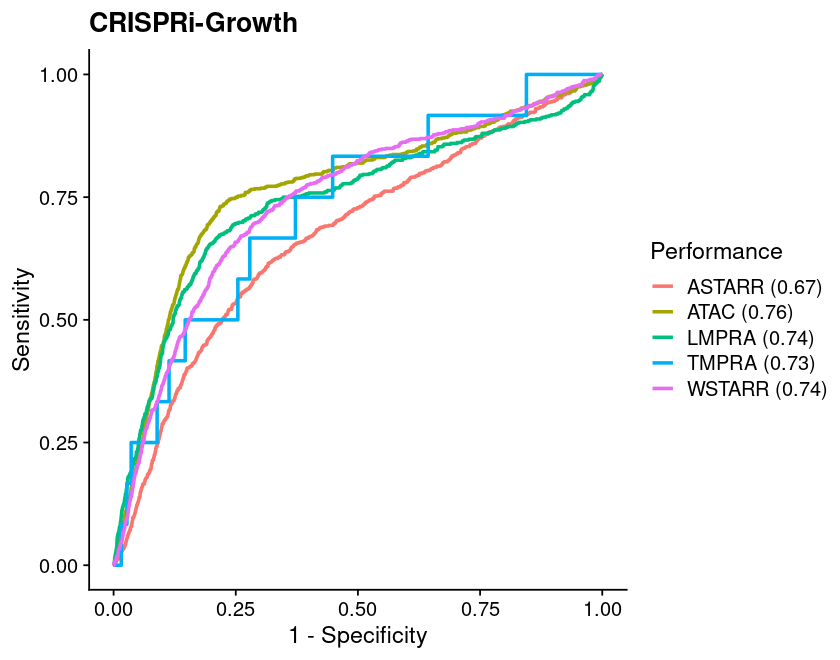

In [14]:
dat = dat_auroc_assay
gpt = ggplot(dat, aes(x=x, y=y, group=Assay, color=Performance)) +
    geom_line(linewidth=1) +
    labs(x = "1 - Specificity", y = "Sensitivity", title = TXT_ASSAY_OUT) +
    theme_cowplot()

gpt_export_auroc_by_assay = gpt
options(repr.plot.width=7, repr.plot.height=5.5)
print(gpt)

## Perform logistic regression with full assay

In [15]:
lst = lst_dat_region_score
lst = lst[VEC_TXT_ASSAY]
dat = bind_rows(lst, .id = "Assay")
dat = dat %>% 
    dplyr::select(Region, Score, Assay) %>%
    tidyr::spread(Assay, Score) %>% 
    na.omit

### assign and show
dat_region_score = dat
print(dim(dat))
fun_display_table(head(dat))

[1] 1237    6


Region,ASTARR,ATAC,LMPRA,TMPRA,WSTARR
chr11:32870601-32871324,-0.8538079,2.467392,-0.3215166,-0.8266463,-1.1918490
chr11:32874343-32875070,-0.8072207,1.756847,-0.8170978,-0.5623429,-0.6172344
chr11:32884749-32885822,-1.0094371,2.087080,1.3800391,-0.0558774,-0.4409810
chr11:32901572-32902485,-0.5173027,1.459900,-0.1454310,-0.8996262,-0.2380913
chr11:32903491-32904506,0.0680074,1.860986,1.1180286,-0.7975782,-1.7982740
chr11:32910855-32912010,0.4775592,2.814297,0.1459271,1.5677460,-0.0268376


In [16]:
### combine group and score
dat = dplyr::inner_join(
    dat_region_group,
    dat_region_score,
    by = "Region"
)
dat_region_merge = dat

### apply logistic regression
dat = dat_region_merge
fit = glm(
    Group ~ ATAC + ASTARR + WSTARR + LMPRA + TMPRA, 
    data   = dat, 
    family = "binomial")
vec_boo_group = (dat$Group == 1)
vec_num_score = predict(fit, type = "response")

### calculate assay performance
lst = fun_auroc(vec_boo_group, vec_num_score)
vec_num_spec = lst[["Specificity"]]
vec_num_sens = lst[["Sensitivity"]]
num_auroc    = lst[["AUROC"]]

### summarize the results
txt_assay = "Total"
txt_title = paste0("(", round(num_auroc, 2), ")")
txt_title = paste(txt_assay, txt_title)

dat = data.frame(
    "x" = 1 - vec_num_spec,
    "y" = vec_num_sens,
    "Assay" = txt_assay,
    "AUROC" = num_auroc,
    "Performance" = txt_title
)
dat = dat %>% dplyr::arrange(x, y)

### assign and show
dat_auroc_total = dat
print(dim(dat))
fun_display_table(head(dat, 3))

[1] 575   5


x,y,Assay,AUROC,Performance
0.0000000,0,Total,0.9152212,Total (0.92)
0.0017699,0,Total,0.9152212,Total (0.92)
0.0035398,0,Total,0.9152212,Total (0.92)


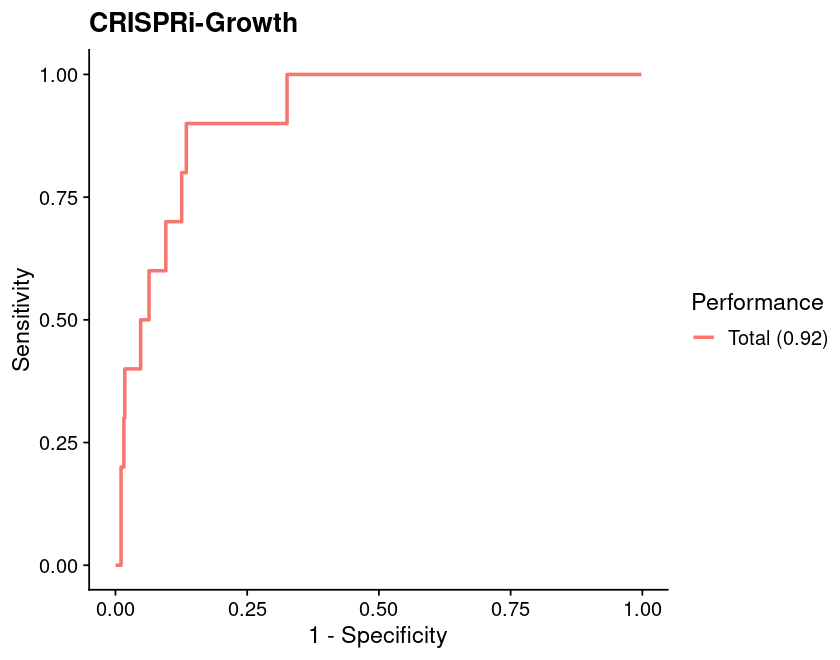

In [17]:
dat = dat_auroc_total
gpt = ggplot(dat, aes(x=x, y=y, group=Assay, color=Performance)) +
    geom_line(linewidth=1) +
    labs(x = "1 - Specificity", y = "Sensitivity", title = TXT_ASSAY_OUT) +
    theme_cowplot()

options(repr.plot.width=7, repr.plot.height=5.5)
print(gpt)

## Export plots

In [18]:
plt_export = gpt_export_auroc_by_assay
txt_export = "fig.region_coverage_fcc.roc.top_one_percent.crispri_growth"

txt_fdiry = "./"
txt_fname = paste(txt_export, "png", sep = ".")
txt_fpath = file.path(txt_fdiry, txt_fname)
ggsave(txt_fpath, plt_export, height = 5.5, width = 7, units = "in")

txt_fdiry = "./"
txt_fname = paste(txt_export, "svg", sep = ".")
txt_fpath = file.path(txt_fdiry, txt_fname)
ggsave(txt_fpath, plt_export, height = 5.5, width = 7, units = "in")